In [47]:
seed_ = 2
from numpy.random import seed
seed(seed_)
from tensorflow.random import set_seed
set_seed(seed_)


import tensorflow as tf, numpy as np, pandas as pd
import tensorflow_docs as tfdocs
import tensorflow_docs.plots, tensorflow_docs.modeling
from matplotlib import pyplot as plt
from sklearn.utils.class_weight import compute_sample_weight
import tensorflow.keras.backend as K


df = pd.read_excel('../../../Desktop/新冠数据/新冠数据_协和.xlsx', sheet_name='data', index_col=0)
df = df.dropna().sample(frac=1, random_state=seed_)
X = df[['lymphocyte(%)', 'Neutrophil', 'LDH', 'CRP']]
X = (X - X.mean()) / X.var()
Y = (df['Status'] == 'died').astype(int)
#Y = pd.get_dummies(df['Status'], prefix='Status')

In [36]:
sample_weight = compute_sample_weight(y=Y, class_weight='balanced')

Epoch 1/500

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

72/72 [==============================] - 1s 10ms/step - loss: 0.6642 - acc: 0.6144 - auc: 0.8012 - weighted_acc: 0.7323 - val_loss: 0.8278 - val_acc: 0.6094 - val_auc: 0.8254 - val_weighted_acc: 0.7943
Epoch 2/500
72/72 [==============================] - 0s 2ms/step - loss: 0.6602 - acc: 0.6266 - auc: 0.8255 - weighted_acc: 0.7433 - val_loss: 0.8180 - val_acc: 0.6484 - val_auc: 0.8959 - val_weighted_acc: 0.8120
Epoch 3/500
72/72 [==============================] - 0s 2ms/step - loss: 0.6566 -

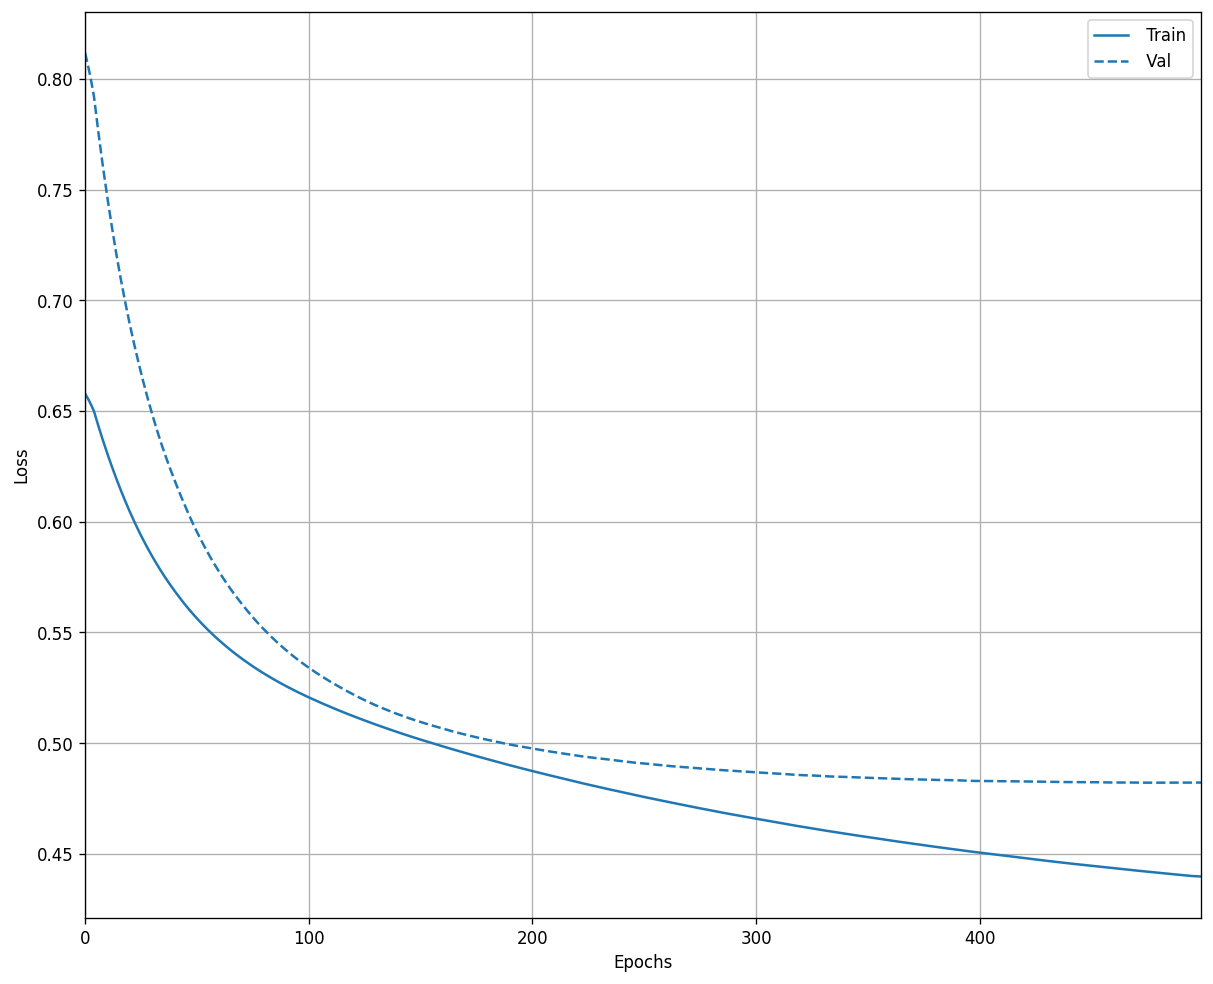

In [48]:
size_histories = {}
stopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=1000, verbose=1, 
                                           mode='auto', restore_best_weights=True)
for n in ['']: # 
    model = tf.keras.Sequential([])
    for i in range(len(n)):
        model.add(tf.keras.layers.Dense(2**int(n[i]), activation='relu', 
                                            kernel_initializer=tf.keras.initializers.HeUniform(seed=seed_)))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', 
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), 
                  metrics=['acc', tf.keras.metrics.AUC(name='auc')],
                  weighted_metrics=['acc'])
    size_histories[n] = model.fit(X, Y, batch_size=16, epochs=500, validation_split=0.1, 
                                  sample_weight=sample_weight, 
                                  #callbacks=[stopper],
                                  verbose=1)
loss_plotter = tfdocs.plots.HistoryPlotter(metric='loss', smoothing_std=1)
plt.figure(figsize=(12, 10), dpi=120)
loss_plotter.plot({key: value for key, value in size_histories.items() if key in size_histories.keys()})

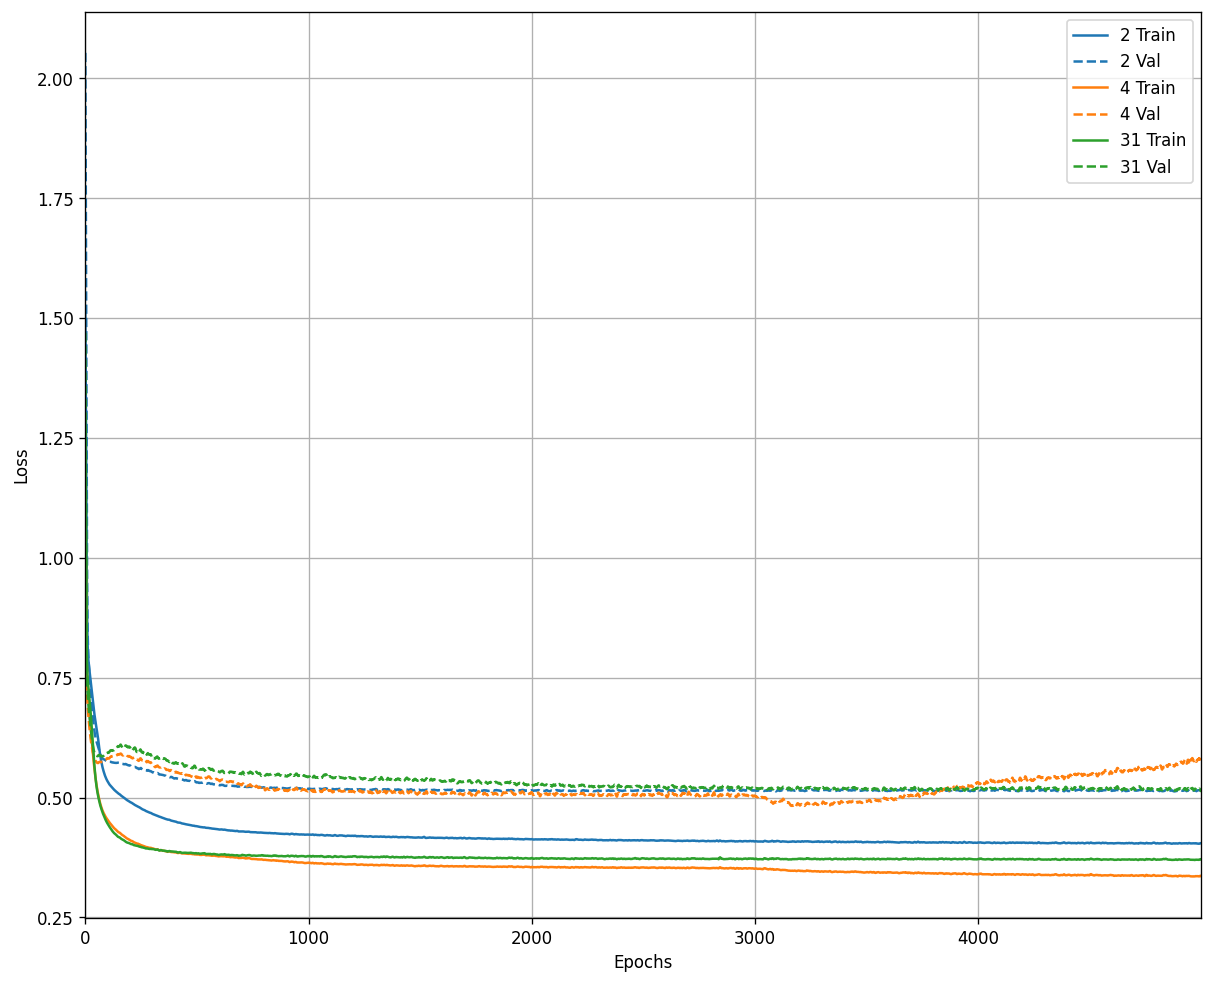

In [30]:
loss_plotter = tfdocs.plots.HistoryPlotter(metric='loss', smoothing_std=1)
plt.figure(figsize=(12, 10), dpi=120)
loss_plotter.plot({key: value for key, value in size_histories.items() if key in size_histories.keys()})
#plt.ylim(0.25, 0.4)
#plt.xlim(800, 1000)

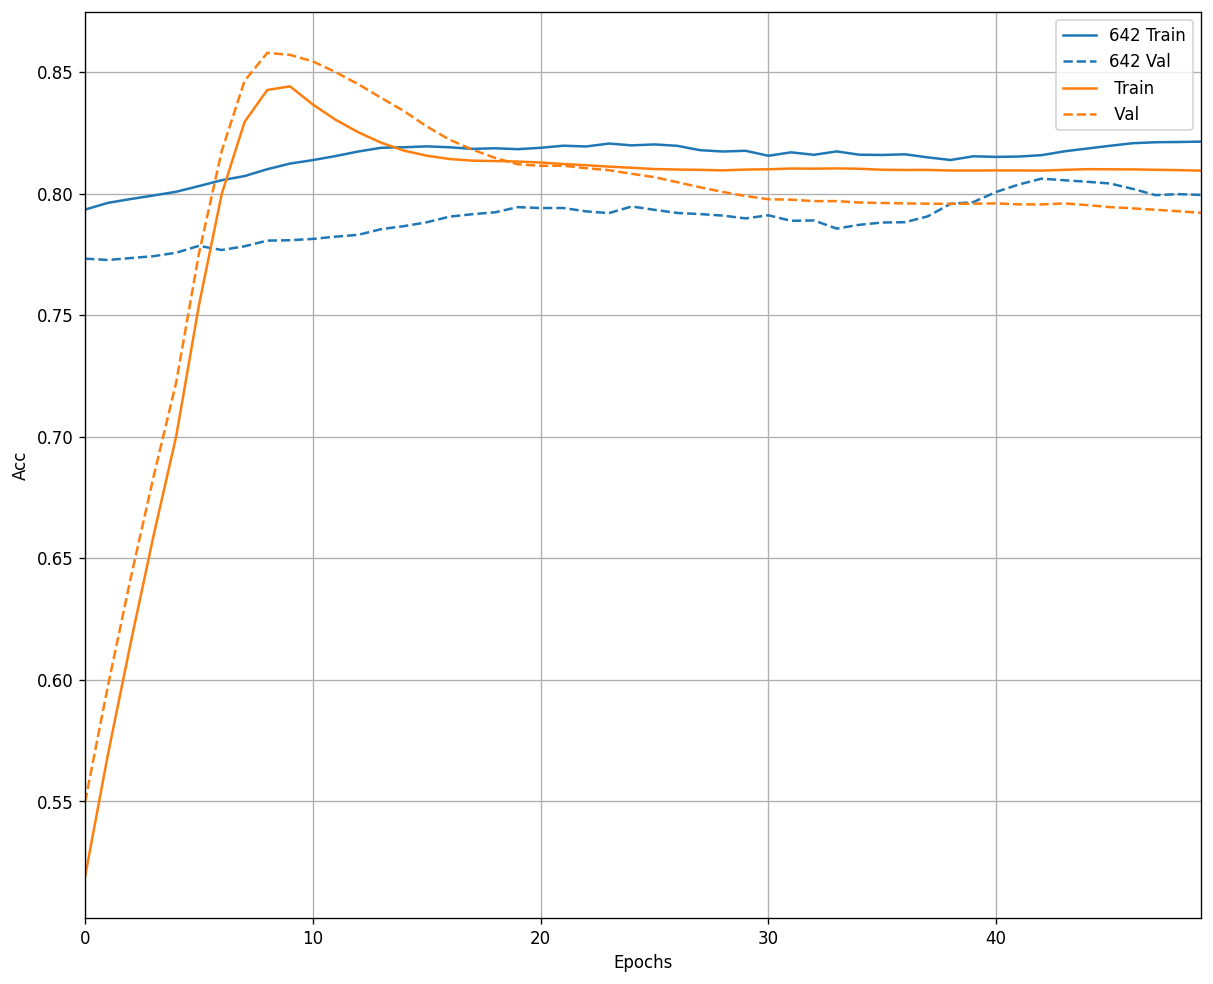

In [42]:
acc_plotter = tfdocs.plots.HistoryPlotter(metric='acc', smoothing_std=1)
plt.figure(figsize=(12, 10), dpi=120)
acc_plotter.plot({key: value for key, value in size_histories.items() if key in size_histories.keys()})
#plt.ylim(0.8, 1)
#plt.xlim(800, 1000)

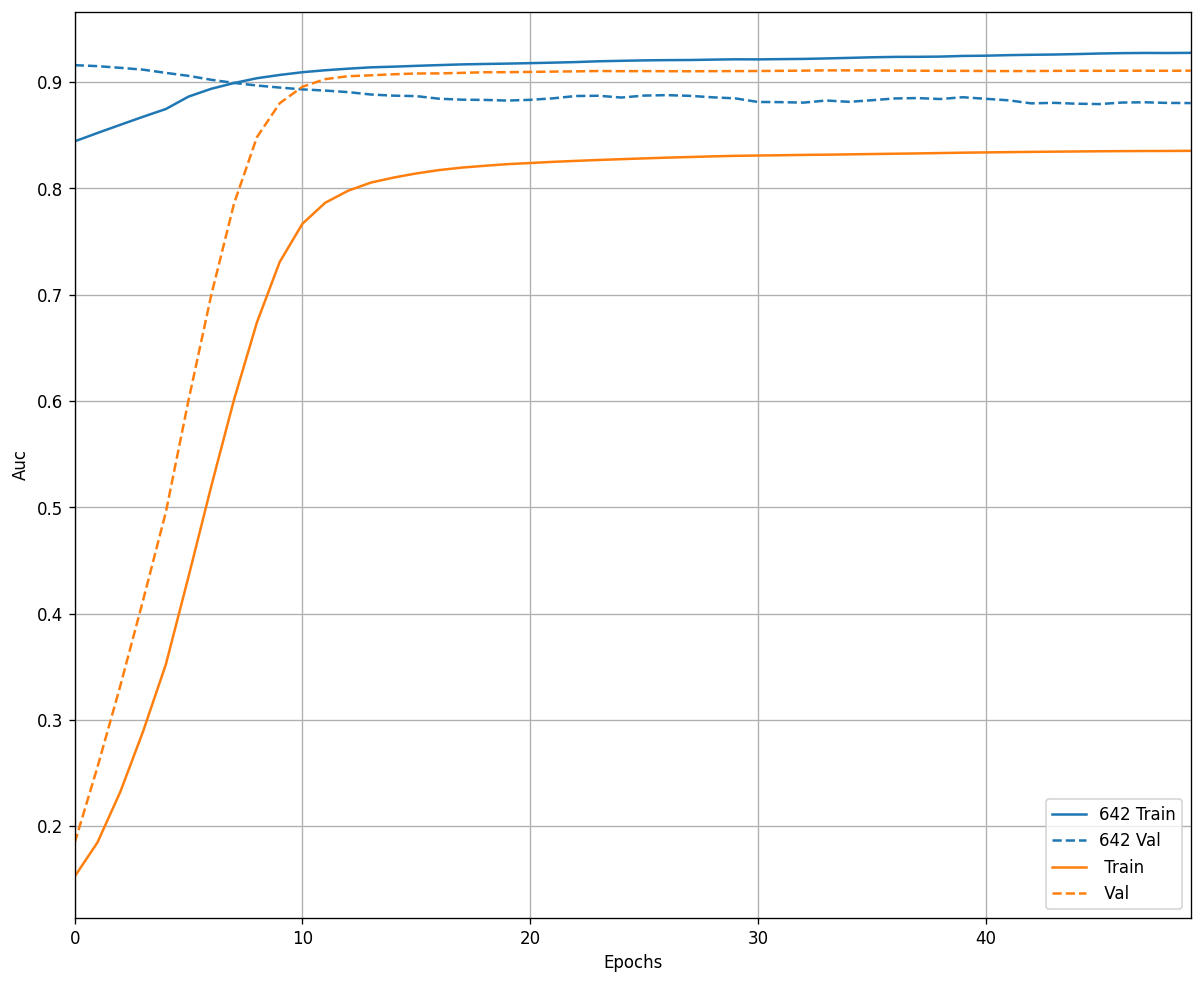

In [43]:
auc_plotter = tfdocs.plots.HistoryPlotter(metric='auc', smoothing_std=1)
plt.figure(figsize=(12, 10), dpi=120)
auc_plotter.plot({key: value for key, value in size_histories.items() if key in size_histories.keys()})
#plt.ylim(0.8, 1)
#plt.xlim(800, 1000)